In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [4]:
df = pd.read_csv("../../../dados/nlp/news_sentiment_analysis.csv", encoding="utf-8")
textos = df[["Description"]]

In [5]:
tokenizer = Tokenizer(num_words = 2000)
tokenizer.fit_on_texts( textos["Description"] )
vocabulario = tokenizer.word_index
# vocabulario

In [6]:
len(vocabulario)

20859

In [7]:
sequencias = tokenizer.texts_to_sequences( textos["Description"] )

In [8]:
textos["Description"][1]

'Harare, Zimbabwe – Local businesses are grappling with a severe liquidity crunch, which is limiting [...]'

In [23]:
sequencias[1]

[211, 373, 212, 46, 10, 5, 81, 12]

In [26]:
lista_sequencias = []
lista_classes = []
maximo_palavras = 0
for seq in sequencias:
    tokens = seq
    if len(seq) > maximo_palavras:
        maximo_palavras = len(seq)
    for index, token in enumerate(tokens[:-1]):
        seq_tokens = tokens[0: index + 2]
        lista_classes.append(seq_tokens.pop())
        lista_sequencias.append(seq_tokens)
maximo_palavras

90

In [32]:
lista_sequencias[1:10]

[[598, 117],
 [598, 117, 5],
 [598, 117, 5, 15],
 [598, 117, 5, 15, 79],
 [598, 117, 5, 15, 79, 11],
 [598, 117, 5, 15, 79, 11, 199],
 [598, 117, 5, 15, 79, 11, 199, 413],
 [598, 117, 5, 15, 79, 11, 199, 413, 352],
 [598, 117, 5, 15, 79, 11, 199, 413, 352, 468]]

In [34]:
lista_classes[1:10]

[5, 15, 79, 11, 199, 413, 352, 468, 1]

In [36]:
X = pad_sequences(lista_sequencias, padding="pre")
X.shape

(133460, 89)

In [38]:
lista_classes[0:10]

[117, 5, 15, 79, 11, 199, 413, 352, 468, 1]

In [40]:
label_encoder = LabelEncoder()
class_encoded = label_encoder.fit_transform( lista_classes )
class_encoded.shape

(133460,)

In [42]:
class_encoded

array([116,   4,  14, ...,  17,   8,  16], dtype=int64)

In [44]:
class_encoded_2d = class_encoded.reshape( class_encoded.shape[0], 1 )

In [46]:
class_encoded_2d

array([[116],
       [  4],
       [ 14],
       ...,
       [ 17],
       [  8],
       [ 16]], dtype=int64)

In [48]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

In [50]:
Y = one_hot_encoder.fit_transform( class_encoded_2d )
Y.shape

(133460, 1998)

In [52]:
Y[0:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [54]:
modelo = Sequential()
modelo.add(Embedding(input_dim=2000, output_dim=32))
modelo.add(LSTM(64))
modelo.add(Dense(Y.shape[1], activation="softmax"))
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
adam_opt = Adam(learning_rate = 0.01)
modelo.compile(optimizer=adam_opt, metrics=["accuracy"], loss="categorical_crossentropy")

In [64]:
hist = modelo.fit(X, Y, epochs=10, batch_size = 32)

Epoch 1/10
4171/4171 ━━━━━━━━━━━━━━━━━━━━ 186s 45ms/step - accuracy: 0.2270 - loss: 4.9194
Epoch 2/10
4171/4171 ━━━━━━━━━━━━━━━━━━━━ 125s 30ms/step - accuracy: 0.3377 - loss: 3.8325
Epoch 3/10
4171/4171 ━━━━━━━━━━━━━━━━━━━━ 203s 49ms/step - accuracy: 0.3654 - loss: 3.5486
Epoch 4/10
4171/4171 ━━━━━━━━━━━━━━━━━━━━ 149s 36ms/step - accuracy: 0.3773 - loss: 3.4077
Epoch 5/10
4171/4171 ━━━━━━━━━━━━━━━━━━━━ 143s 34ms/step - accuracy: 0.3854 - loss: 3.3210
Epoch 6/10
4171/4171 ━━━━━━━━━━━━━━━━━━━━ 205s 49ms/step - accuracy: 0.3924 - loss: 3.2540
Epoch 7/10
4171/4171 ━━━━━━━━━━━━━━━━━━━━ 131s 31ms/step - accuracy: 0.3956 - loss: 3.2208
Epoch 8/10
4171/4171 ━━━━━━━━━━━━━━━━━━━━ 218s 52ms/step - accuracy: 0.3989 - loss: 3.1957
Epoch 9/10
4171/4171 ━━━━━━━━━━━━━━━━━━━━ 152s 36ms/step - accuracy: 0.3969 - loss: 3.1817
Epoch 10/10
4171/4171 ━━━━━━━━━━━━━━━━━━━━ 212s 51ms/step - accuracy: 0.4014 - loss: 3.1677


In [87]:
acuracia_max = np.max(hist.history["accuracy"])
loss_max = np.max(hist.history["loss"])

norm_acuracia = hist.history["accuracy"]/acuracia_max
norm_loss = hist.history["loss"]/loss_max

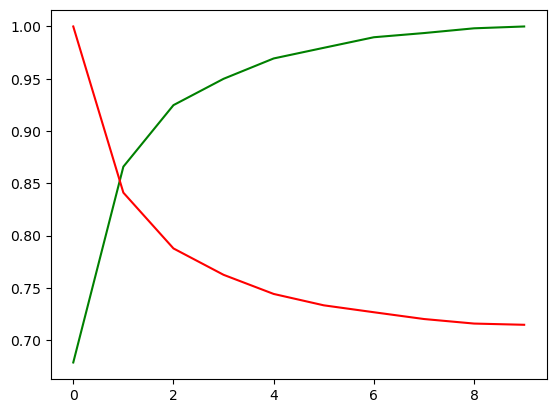

In [89]:
import matplotlib.pyplot as plt
plt.plot(norm_acuracia, color="green")
plt.plot(norm_loss, color="red")
plt.show()

In [66]:
texto_inicial = "Europe and the US briefly upped the pressure on Russia over"

In [67]:
texto_em_sequencias = np.array(tokenizer.texts_to_sequences( [texto_inicial] ))
sequencias_padded = pad_sequences( texto_em_sequencias, maxlen=maximo_palavras, padding="pre" )
sequencias_padded

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   4,   1, 287,   1,   7, 112]])

In [68]:
#                 0   1  2   3    4    5      6
# arr1 = np.array([0.5, 1, 2, 0.9, 12, 0.0001, 0.3])
# np.argmax( arr1 )

In [70]:
predicted_one_hot_encoded_word = modelo.predict([sequencias_padded])
num_palavra = np.argmax( predicted_one_hot_encoded_word )
num_palavra

C:\Users\anton\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 90))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


4

In [71]:
proxima_palavra = label_encoder.inverse_transform([num_palavra])
proxima_palavra[0]

5

In [73]:
for item in vocabulario.items():
    if item[1] == proxima_palavra[0]:
        print(item[0])
    

a


In [75]:
def proxima_palavra( texto ):
    # Transforma o texto em uma sequencia de numeros conforme o vocabulario criado pelo tokenizer
    texto_em_sequencias = np.array(tokenizer.texts_to_sequences( [texto] ))
    
    # Transformar a sequencia em uma sequencia com paddings (zeros a esquerda) para deixar a sequencia com o tamanho
    # padrão que é o valor que está em maximo_palavras (89 palavras por texto)
    sequencias_padded = pad_sequences( texto_em_sequencias, maxlen=maximo_palavras, padding="pre" )

    # Aplicação a sequencia com o padding (padded) no modelo, para que ele descubra qual é a proxima palavra
    # o modelo retorna um onehotencoded com as probabilidades de cada palavra
    predicted_one_hot_encoded_word = modelo.predict([sequencias_padded])
    
    # Verifica qual palavra tem a maior probabilidade de ocorrer
    num_palavra = np.argmax( predicted_one_hot_encoded_word )

    # A palavra com a maior probabilidade ainda precisa passar pelo LabelEncoder para ser decodificada
    proxima_palavra = label_encoder.inverse_transform([num_palavra])

    # Procura o numero da palavra no vocabulario, para descobrir qual é o seu texto
    for item in vocabulario.items():
        if item[1] == proxima_palavra[0]:
            return texto + " " + item[0]

In [81]:
def completar_texto( texto, num_palavras = 3):
    novo_texto = texto
    for i in range(num_palavras):
        novo_texto = proxima_palavra( novo_texto )
    return novo_texto

In [85]:
completar_texto("Local businesses are grappling with a severe", 5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


'Local businesses are grappling with a severe massive airstrike that local was'

In [ ]:
# vocabulario = {
#     'a': 0,
#     'the': 1,
#     'harare': 2,
#     'good': 1000, 
#     # 0         1
#     'trump': 5000,   
# }